In [18]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import tsfel
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet('train.parquet')

In [16]:
df

,id,dates,values,label
0,19114,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....",0.0
1,22769,"[2016-05-01, 2016-06-01, 2016-07-01, 2016-08-0...","[-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...",1.0
2,76935,"[2017-03-01, 2017-04-01, 2017-05-01, 2017-06-0...","[0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...",0.0
3,66297,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...",0.0
4,2191,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...",0.0
...,...,...,...,...
79995,71474,"[2018-10-01, 2018-11-01, 2018-12-01, 2019-01-0...","[-0.15, -1.13, -0.87, 0.49, 0.87, 1.67, 1.91, ...",0.0
79996,36908,"[2016-07-01, 2016-08-01, 2016-09-01, 2016-10-0...","[-0.35, -1.31, 0.11, 1.46, 1.28, 1.12, 1.78, 1...",1.0
79997,63517,"[2016-03-01, 2016-04-01, 2016-05-01, 2016-06-0...","[-0.78, -2.27, -1.85, -0.67, -1.2, -2.02, 0.12...",0.0
79998,94731,"[2016-02-01, 2016-03-01, 2016-04-01, 2016-05-0...","[-2.29, -2.85, 0.92, -0.83, -1.75, -1.81, -2.2...",0.0


In [4]:
df_exploded = df.explode(['dates', 'values'], ignore_index=True)


In [7]:
#Посмотрим на дизбаланс классов
df.label.value_counts()
#Исходя из того что не известно то что мы классифицируем, можно сказать что особо сильного дизбаланса нет и количества данных достаточно для обучения

label
0.0    57820
1.0    22180
Name: count, dtype: int64

In [15]:
print(df_exploded['values'].max())
print(df_exploded['values'].min())
print(df_exploded['values'].std())

9.54
-7.95
1.2247845174489713


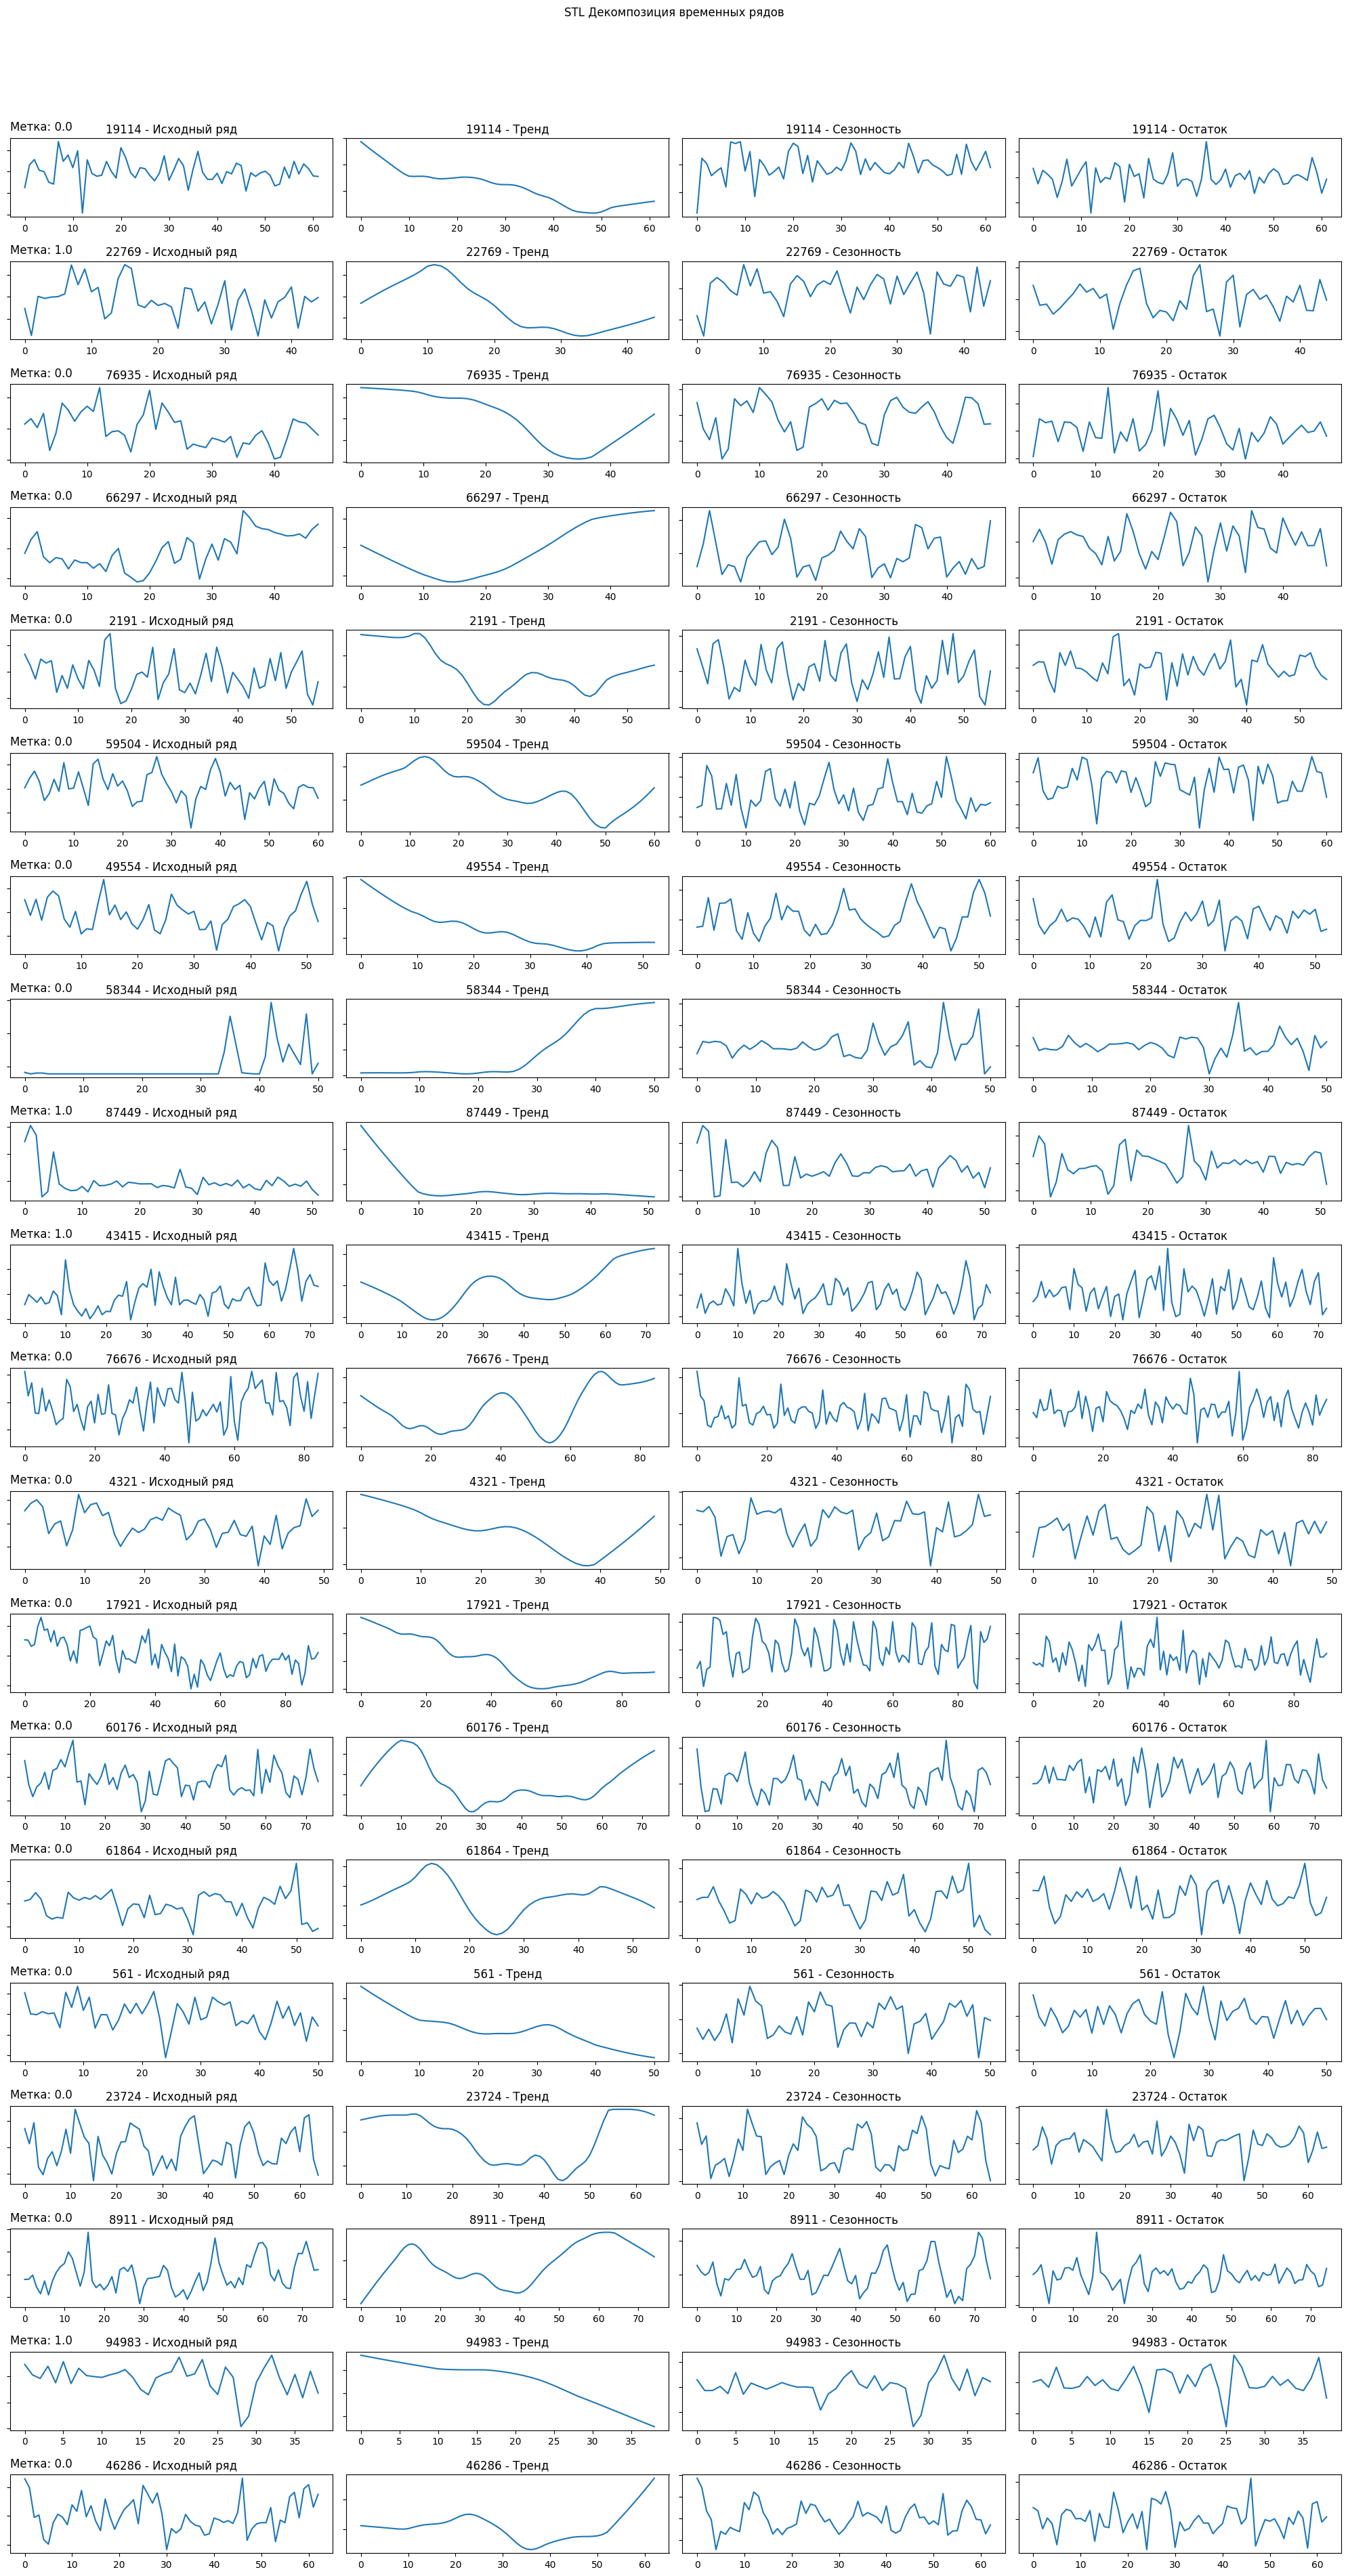

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

fig, axs = plt.subplots(20, 4, figsize=(20, 40))
fig.suptitle("STL Декомпозиция временных рядов")


seasonal_period = 12
seasonal_param = 11

for i in range(20): 
    row = df.iloc[i]
    values = row['values']
    label = row.get('label', 'Нет метки') 
    
    row_title = f"Метка: {label}"
    axs[i, 0].text(0, 1.1, row_title, transform=axs[i, 0].transAxes, fontsize=12, ha='left')

    axs[i, 0].plot(values)
    axs[i, 0].set_title(f'{row["id"]} - Исходный ряд')
    
 
    if len(values) >= seasonal_period * 2:
        stl = STL(values, period=seasonal_period, seasonal=seasonal_param)
        result = stl.fit()
        
        axs[i, 1].plot(result.trend)
        axs[i, 1].set_title(f'{row["id"]} - Тренд')
        
        axs[i, 2].plot(result.seasonal)
        axs[i, 2].set_title(f'{row["id"]} - Сезонность')
        
        axs[i, 3].plot(result.resid)
        axs[i, 3].set_title(f'{row["id"]} - Остаток')
    else:
        
        axs[i, 1].text(0.5, 0.5, 'Недостаточно данных', ha='center', va='center')
        axs[i, 2].text(0.5, 0.5, 'Недостаточно данных', ha='center', va='center')
        axs[i, 3].text(0.5, 0.5, 'Недостаточно данных', ha='center', va='center')
    
    for j in range(4):
        axs[i, j].set_yticklabels([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
#Исходя из того что не известно что описывают данные можно взять простейшие фичи 
# из временных рядов с помощью tsfel 
#Вот их список 
# 4 Лага
#RMS - Cреднеквадратичное отклонение
#Mean - Среднее значение
#Max - Максимум
#Kurtosis - Эксцесс
#Skew -Ассиметрия
#Interquartile range — Интерквартильный размах
#Spectral entropy — Спектральная энтропия
#Max power spectrum — Максимальная мощность спектра
#Maximum frequency — Максимальная частота
#Median frequency — Медианная частота
#Standard deviation — Стандартное отклонение
#Variance — Дисперсия
#Mean diff — Среднее значение разностей
#Neighbourhood peaks — Пики в окрестности
#Centroid — Центроид (или "Центр тяжести" спектра, если речь о частотах)
#Mean absolute diff — Среднее абсолютное значение разностей
#Peak to peaks distance — Расстояние между пиками





